## Basic Classification using example Predicting Customer Purchase predict if customer will the product or not

In [1]:
# pip install matplotlib
# pip install pandas
# pip install numpy
# pip install scikit-learn
# pip install tensorflow

In [3]:
# Import required libraries we will use it latter in code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [20]:
# Here we are Generating some random data to match with our example so that we can understand the concept
np.random.seed(0)
data = {
    'Age': np.random.randint(18, 65, size=1000),
    'Income': np.random.normal(50000, 15000, size=1000),
    'Gender': np.random.choice(['Male', 'Female'], size=1000),
    'Purchased': np.random.randint(0, 2, size=1000)
}
df = pd.DataFrame(data)

# this is Our Raw Data without any pre processing
df.head()

,Age,Income,Gender,Purchased
0,62,45555.122131,Male,1
1,18,65804.763968,Female,1
2,21,46425.190744,Female,1
3,21,49113.056130,Male,0
4,57,72423.354896,Female,1


In [21]:
# Convert categorical variables to numerical labels we will see output later on
label_encoder = LabelEncoder()

# Machine not understand the string values so we needs to convert them into numeric  values 
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,Age,Income,Gender,Purchased
0,62,45555.122131,1,1
1,18,65804.763968,0,1
2,21,46425.190744,0,1
3,21,49113.056130,1,0
4,57,72423.354896,0,1


In [22]:
# Split the data into training and test sets
X = df[['Age', 'Income', 'Gender']].values

# We have stored Purchased in y value as we this is our prediction result 
y = df['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# here we have 800 records with 4 columns  ['Age', 'Income', 'Gender', 'Clicked Ad']
print(X_train.shape)

X_train

(800, 3)


array([[3.30000000e+01, 5.11400327e+04, 1.00000000e+00],
       [3.80000000e+01, 8.23629672e+04, 0.00000000e+00],
       [2.10000000e+01, 5.51546282e+04, 1.00000000e+00],
       ...,
       [5.60000000e+01, 6.27118392e+04, 0.00000000e+00],
       [6.00000000e+01, 4.86448798e+04, 0.00000000e+00],
       [5.40000000e+01, 5.82518531e+04, 1.00000000e+00]])

it's often beneficial to standardize or normalize your data before feeding it into a model


Why Standardization?
Equal Scaling: Standardizing the data ensures that all features have the same scale. This is important for algorithms that rely on distance metrics or gradient-based optimization (like neural networks and SVMs) because features with larger scales can dominate those with smaller scales.

Mean Centering: It centers the data around 0, which can make convergence faster during model training and helps algorithms reach optimal performance.

Avoiding Biased Results: It prevents certain features from dominating solely because of their larger numerical range.

In [25]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[ 0.25640872,  0.35617122, -0.99750312],
       [ 0.18325359,  1.65043007, -0.99750312],
       [-0.18252204,  0.75673399,  1.00250313],
       [-0.40198742,  0.97516696, -0.99750312],
       [ 0.11009846,  0.4337101 , -0.99750312],
       [ 0.47587409,  0.08824141,  1.00250313],
       [-0.40198742, -1.1566353 , -0.99750312],
       [ 1.28058048,  1.45774541,  1.00250313],
       [-0.54829767, -1.32133709,  1.00250313],
       [-1.49931431, -0.4256435 ,  1.00250313],
       [ 0.98795998,  0.4242746 ,  1.00250313],
       [ 1.42689073,  1.49142533,  1.00250313],
       [ 0.18325359,  1.80818394, -0.99750312],
       [-1.27984893,  0.72827676, -0.99750312],
       [ 0.18325359,  0.67534546,  1.00250313],
       [ 0.47587409, -0.32922165,  1.00250313],
       [-0.32883229,  0.31610271,  1.00250313],
       [-0.40198742,  0.24319733, -0.99750312],
       [ 0.91480485,  1.04032175,  1.00250313],
       [-0.47514254, -0.2331089 ,  1.00250313],
       [ 0.25640872,  0.52586328, -0.997

## Build the model architecture

In [12]:
(X_train.shape[1],)
# X_train

(4,)

In [14]:
# we are creating a model using tensor flow library
# X_train.shape[1]  code help to identify input shape
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 32 neurons, ReLU activation
    Dense(32, activation='relu'),  # Hidden layer with 16 neurons, ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron, Sigmoid activation for binary classification
])

# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer with learning rate 0.001
              loss='binary_crossentropy',  # Binary cross-entropy loss function for binary classification
              metrics=['accuracy'])  # Evaluation metric to monitor during training is accuracy

# Step 3: Train the model
history = model.fit(X_train, y_train,  # Training data and labels
                    epochs=500,  # Number of epochs (iterations over the entire training data)
                    batch_size=32,  # Number of samples per gradient update
                    validation_split=0.2)  # Fraction of training data to be used as validation data

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5232 - loss: 2872.9653 - val_accuracy: 0.5562 - val_loss: 449.4433
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5069 - loss: 328.4450 - val_accuracy: 0.5562 - val_loss: 54.4002
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5143 - loss: 59.0442 - val_accuracy: 0.4437 - val_loss: 24.3680
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5381 - loss: 21.3643 - val_accuracy: 0.5562 - val_loss: 50.4300
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 43.5781 - val_accuracy: 0.5562 - val_loss: 53.4331
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5270 - loss: 35.3349 - val_accuracy: 0.4375 - val_loss: 3.1333
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5238 - loss: 34.1458 - val_accuracy: 0.4437 - val_loss: 94.8825
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4544 - loss: 68.5313 - val_ac

In [15]:
history.model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,301 (28.52 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,868 (19.02 KB)

3. Evaluate the Model
Evaluate the model using the test data:

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5062 - loss: 20.3421 
Test Accuracy: 0.5149999856948853


4. Plot Training History (Optional)
Optionally, you can plot the training history:

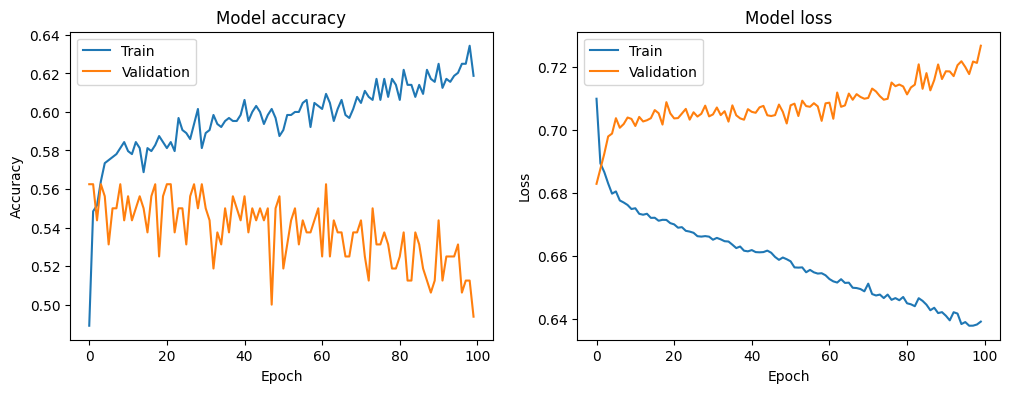

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()